<a href="https://colab.research.google.com/github/minofeel/-/blob/main/PMLB_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 필요한 라이브러리 설치
!pip install pmlb feyn scikit-learn pandas matplotlib gplearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.6 MB/s eta 0:00:00


In [11]:
import pmlb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, ensemble
from sklearn.ensemble import BaggingRegressor
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import r2_score
import time
from google.colab import files

In [12]:
datasets = pd.DataFrame([
('1027_ESL', 488, 5),
('1028_SWD', 1000, 11),
('1029_LEV', 1000, 5),
('1030_ERA', 1000, 5),
('1089_USCrime', 47, 14),
('1096_FacultySalaries', 50, 5),
('1191_BNG_pbc', 1000000, 19),
('1193_BNG_lowbwt', 31104, 10),
('1196_BNG_pharynx', 1000000, 11),
('1199_BNG_echoMonths', 17496, 10),
('1201_BNG_breastTumor', 116640, 10),
('1203_BNG_pwLinear', 177147, 11),
('1595_poker', 1025010, 11),
('192_vineyard', 52, 3),
('195_auto_price', 159, 16),
('197_cpu_act', 8192, 22),
('201_pol', 15000, 49),
('207_autoPrice', 159, 16),
('210_cloud', 108, 6),
('215_2dplanes', 40768, 11),
('218_house_8L', 22784, 9),
('225_puma8NH', 8192, 9),
('227_cpu_small', 8192, 13),
('228_elusage', 55, 3),
('229_pwLinear', 200, 11),
('230_machine_cpu', 209, 7),
('294_satellite_image', 6435, 37),
('344_mv', 40768, 11),
('4544_GeographicalOriginalofMusic', 1059, 118),
('485_analcatdata_vehicle', 48, 5),
('503_wind', 6574, 15),
('505_tecator', 240, 125),
('519_vinnie', 380, 3),
('522_pm10', 500, 8),
('523_analcatdata_neavote', 100, 3),
('527_analcatdata_election2000', 67, 15),
('529_pollen', 3848, 5),
('537_houses', 20640, 9),
('542_pollution', 60, 16),
('547_no2', 500, 8),
('556_analcatdata_apnea2', 475, 4),
('557_analcatdata_apnea1', 475, 4),
('560_bodyfat', 252, 15),
('561_cpu', 209, 8),
('562_cpu_small', 8192, 13),
('564_fried', 40768, 11),
('573_cpu_act', 8192, 22),
('574_house_16H', 22784, 17),
('579_fri_c0_250_5', 250, 6),
('581_fri_c3_500_25', 500, 26),
('582_fri_c1_500_25', 500, 26),
('583_fri_c1_1000_50', 1000, 51),
('584_fri_c4_500_25', 500, 26),
('586_fri_c3_1000_25', 1000, 26),
('588_fri_c4_1000_100', 1000, 101),
('589_fri_c2_1000_25', 1000, 26),
('590_fri_c0_1000_50', 1000, 51),
('591_fri_c1_100_10', 100, 11),
('592_fri_c4_1000_25', 1000, 26),
('593_fri_c1_1000_10', 1000, 11),
('594_fri_c2_100_5', 100, 6),
('595_fri_c0_1000_10', 1000, 11),
('596_fri_c2_250_5', 250, 6),
('597_fri_c2_500_5', 500, 6),
('598_fri_c0_1000_25', 1000, 26),
('599_fri_c2_1000_5', 1000, 6),
('601_fri_c1_250_5', 250, 6),
('602_fri_c3_250_10', 250, 11),
('603_fri_c0_250_50', 250, 51),
('604_fri_c4_500_10', 500, 11),
('605_fri_c2_250_25', 250, 26),
('606_fri_c2_1000_10', 1000, 11),
('607_fri_c4_1000_50', 1000, 51),
('608_fri_c3_1000_10', 1000, 11),
('609_fri_c0_1000_5', 1000, 6),
('611_fri_c3_100_5', 100, 6),
('612_fri_c1_1000_5', 1000, 6),
('613_fri_c3_250_5', 250, 6),
('615_fri_c4_250_10', 250, 11),
('616_fri_c4_500_50', 500, 51),
('617_fri_c3_500_5', 500, 6),
('618_fri_c3_1000_50', 1000, 51),
('620_fri_c1_1000_25', 1000, 26),
('621_fri_c0_100_10', 100, 11),
('622_fri_c2_1000_50', 1000, 51),
('623_fri_c4_1000_10', 1000, 11),
('624_fri_c0_100_5', 100, 6),
('626_fri_c2_500_50', 500, 51),
('627_fri_c2_500_10', 500, 11),
('628_fri_c3_1000_5', 1000, 6),
('631_fri_c1_500_5', 500, 6),
('633_fri_c0_500_25', 500, 26),
('634_fri_c2_100_10', 100, 11),
('635_fri_c0_250_10', 250, 11),
('637_fri_c1_500_50', 500, 51),
('641_fri_c1_500_10', 500, 11),
('643_fri_c2_500_25', 500, 26),
('644_fri_c4_250_25', 250, 26),
('645_fri_c3_500_50', 500, 51),
('646_fri_c3_500_10', 500, 11),
('647_fri_c1_250_10', 250, 11),
('648_fri_c1_250_50', 250, 51),
('649_fri_c0_500_5', 500, 6),
('650_fri_c0_500_50', 500, 51),
('651_fri_c0_100_25', 100, 26),
('653_fri_c0_250_25', 250, 26),
('654_fri_c0_500_10', 500, 11),
('656_fri_c1_100_5', 100, 6),
('657_fri_c2_250_10', 250, 11),
('658_fri_c3_250_25', 250, 26),
('659_sleuth_ex1714', 47, 8),
('663_rabe_266', 120, 3),
('665_sleuth_case2002', 147, 7),
('666_rmftsa_ladata', 508, 11),
('678_visualizing_environmental', 111, 4),
('687_sleuth_ex1605', 62, 6),
('690_visualizing_galaxy', 323, 5),
('695_chatfield_4', 235, 13),
('706_sleuth_case1202', 93, 7),
('712_chscase_geyser1', 222, 3),
('banana', 5300, 3),
('titanic', 2201, 4),
],
columns=["name", "n", "fcount"])

In [13]:
# 데이터셋 필터링 (10,000개 이하)
chosen_datasets = datasets[(datasets["n"] >= 1000) & (datasets["n"] <= 10000)]
print(f"선택된 데이터셋 수: {len(chosen_datasets)}")

선택된 데이터셋 수: 34


In [14]:
# 모델 리스트 정의
models = [
    linear_model.LinearRegression(),
    linear_model.Lasso(alpha=0.01, max_iter=100000),
    tree.DecisionTreeRegressor(max_depth=2),
    ensemble.RandomForestRegressor(n_estimators=50),
    ensemble.GradientBoostingRegressor(n_estimators=50),

    # Symbolic Regression 모델 추가
    SymbolicRegressor(
        population_size=500,
        generations=20,
        stopping_criteria=0.01,
        function_set=function_set,
        parsimony_coefficient=0.001,
        metric='mse',
        random_state=0
    ),

    # Bagging Symbolic Regression 모델 추가
    BaggingRegressor(
        estimator=SymbolicRegressor(
            population_size=500,
            generations=20,
            stopping_criteria=0.01,
            function_set=function_set,
            parsimony_coefficient=0.001,
            metric='mse',
            random_state=0
        ),
        n_estimators=5,
        random_state=0
    )
]

In [15]:
# 함수 세트 설정
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs']

# 모델 리스트 정의
models = [
    linear_model.LinearRegression(),
    linear_model.Lasso(alpha=0.01, max_iter=100000),
    tree.DecisionTreeRegressor(max_depth=2),
    ensemble.RandomForestRegressor(n_estimators=50),
    ensemble.GradientBoostingRegressor(n_estimators=50),

    # Symbolic Regression 모델 추가
    SymbolicRegressor(
        population_size=500,
        generations=20,
        stopping_criteria=0.01,
        function_set=function_set,
        parsimony_coefficient=0.001,
        metric='mse',
        random_state=0
    ),

    # Bagging Symbolic Regression 모델 추가
    BaggingRegressor(
        estimator=SymbolicRegressor(
            population_size=500,
            generations=20,
            stopping_criteria=0.01,
            function_set=function_set,
            parsimony_coefficient=0.001,
            metric='mse',
            random_state=0
        ),
        n_estimators=5,
        random_state=0
    )
]

# 데이터셋에서 250개 샘플을 훈련 세트로 사용하고 나머지는 검증 세트로 분할
def get_pmlb_data(name, randomseed):
    df = pmlb.fetch_data(name, local_cache_dir="pmlb_data")
    train, test = train_test_split(df, train_size=250, random_state=randomseed)
    return train, test

# 모델 학습 및 R2 스코어 반환 함수
def fit_and_r2_score(model, train, test):
    model.fit(train.iloc[:, :-1], train.iloc[:, -1])
    train_r2 = model.score(train.iloc[:, :-1], train.iloc[:, -1])
    test_r2 = model.score(test.iloc[:, :-1], test.iloc[:, -1])
    return train_r2, test_r2

# Bagging Symbolic Regression에서 가장 대표적인 수식을 선택
def extract_representative_expression(bagging_model, train, test):
    best_r2_score = -float("inf")
    best_expression = None

    for estimator in bagging_model.estimators_:
        # 각 개별 SymbolicRegressor 모델에 대해 성능 계산
        test_pred = estimator.predict(test.iloc[:, :-1])
        r2 = r2_score(test.iloc[:, -1], test_pred)

        # 가장 높은 성능을 가진 수식 선택
        if r2 > best_r2_score:
            best_r2_score = r2
            best_expression = estimator._program

    return str(best_expression)

# 결과 저장용 데이터프레임
results = pd.DataFrame(columns=["dataset", "model", "randomseed", "train_r2", "test_r2", "expression"])

def fit_comparison(name, randomseed):
    global results
    print(f"Seed {randomseed}, Dataset: {name}", end=" ... fetched")

    train, test = get_pmlb_data(name, randomseed)

    for m in models:
        # 이미 실행된 모델은 생략
        if ((results["dataset"] == name) & (results["model"] == str(m)) & (results["randomseed"] == randomseed)).any():
            continue

        # Symbolic Regression 모델 처리
        if isinstance(m, SymbolicRegressor):
            train_r2, test_r2 = fit_and_r2_score(m, train, test)
            expression = str(m._program)  # 수식 추출
            model_name = "Symbolic Regression"

        # Bagging Symbolic Regression 모델 처리
        elif isinstance(m, BaggingRegressor) and isinstance(m.estimator, SymbolicRegressor):
            train_r2, test_r2 = fit_and_r2_score(m, train, test)
            expression = extract_representative_expression(m, train, test)  # 대표 수식 추출
            model_name = "Bagging Symbolic Regression"

        # 그 외 일반 모델 처리
        else:
            train_r2, test_r2 = fit_and_r2_score(m, train, test)
            expression = ""  # 일반 모델에는 수식 없음
            model_name = str(m)

        # 새로운 결과를 DataFrame에 추가
        new_row = pd.DataFrame({
            "dataset": [name],
            "model": [model_name],
            "randomseed": [randomseed],
            "train_r2": [train_r2],
            "test_r2": [test_r2],
            "expression": [expression]
        })
        results = pd.concat([results, new_row], ignore_index=True)

    print(" ... and fitted")

# 각 데이터셋에 대해 5번 반복 실행
start_time = time.time()
total_iterations = len(chosen_datasets["name"]) * 5  # randomseed 범위가 5이므로 수정

for i, name in enumerate(chosen_datasets["name"], start=1):
    for randomseed in range(5):  # 5개의 무작위 시드로 반복
        fit_comparison(name, randomseed)

        # 현재까지 경과 시간과 남은 시간 추정
        elapsed_time = time.time() - start_time
        avg_time_per_iter = elapsed_time / (i * 5 + randomseed)
        remaining_time = avg_time_per_iter * (total_iterations - (i * 5 + randomseed))

        print(f"진행 상황: {i*5 + randomseed}/{total_iterations}, 남은 시간 예상: {remaining_time:.2f} 초")

Seed 0, Dataset: 1028_SWD ... fetched

<ipython-input-15-33c0f371f6f9>:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


 ... and fitted
진행 상황: 5/170, 남은 시간 예상: 2004.65 초
Seed 1, Dataset: 1028_SWD ... fetched ... and fitted
진행 상황: 6/170, 남은 시간 예상: 3185.62 초
Seed 2, Dataset: 1028_SWD ... fetched ... and fitted
진행 상황: 7/170, 남은 시간 예상: 4004.91 초
Seed 3, Dataset: 1028_SWD ... fetched ... and fitted
진행 상황: 8/170, 남은 시간 예상: 4555.92 초
Seed 4, Dataset: 1028_SWD ... fetched ... and fitted
진행 상황: 9/170, 남은 시간 예상: 4986.08 초
Seed 0, Dataset: 1029_LEV ... fetched ... and fitted
진행 상황: 10/170, 남은 시간 예상: 5338.67 초
Seed 1, Dataset: 1029_LEV ... fetched ... and fitted
진행 상황: 11/170, 남은 시간 예상: 5629.89 초
Seed 2, Dataset: 1029_LEV ... fetched ... and fitted
진행 상황: 12/170, 남은 시간 예상: 5858.62 초
Seed 3, Dataset: 1029_LEV ... fetched ... and fitted
진행 상황: 13/170, 남은 시간 예상: 6044.70 초
Seed 4, Dataset: 1029_LEV ... fetched ... and fitted
진행 상황: 14/170, 남은 시간 예상: 6197.27 초
Seed 0, Dataset: 1030_ERA ... fetched ... and fitted
진행 상황: 15/170, 남은 시간 예상: 6343.98 초
Seed 1, Dataset: 1030_ERA ... fetched ... and fitted
진행 상황: 16/170, 남은 시간 

In [16]:
# 결과 저장
results.to_csv("results-cache-100.csv", index=False)

# 파일 다운로드
files.download("results-cache-100.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


<Figure size 1400x800 with 0 Axes>

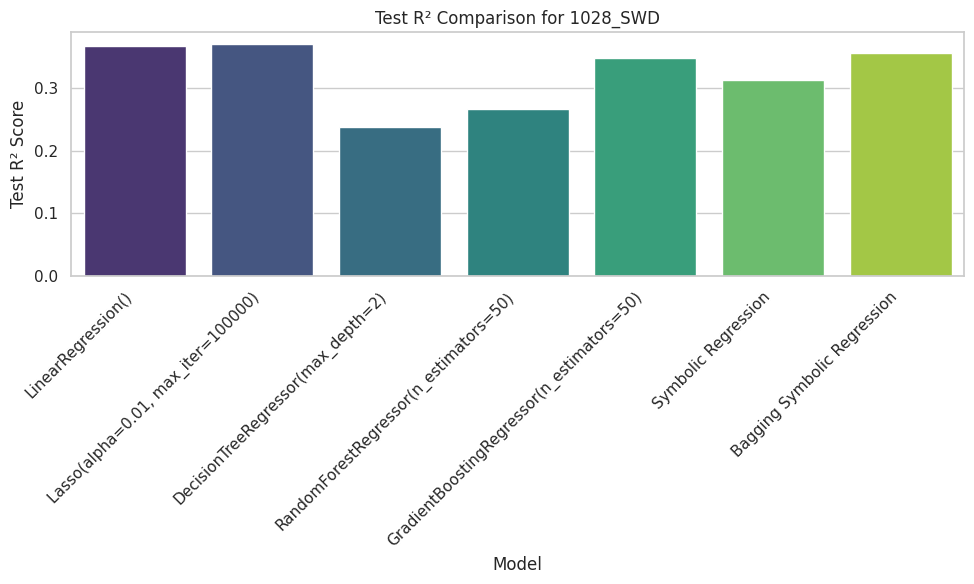

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


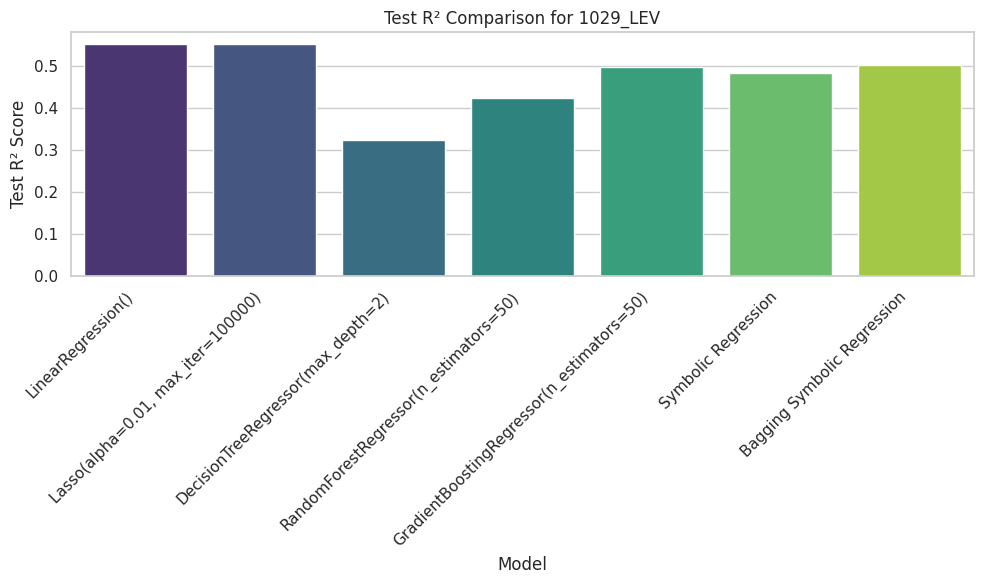

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


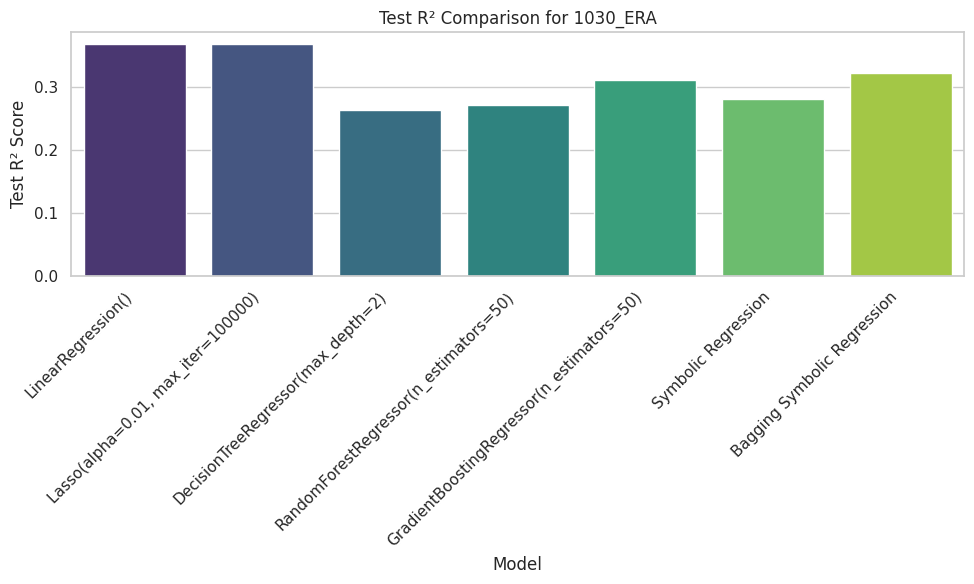

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


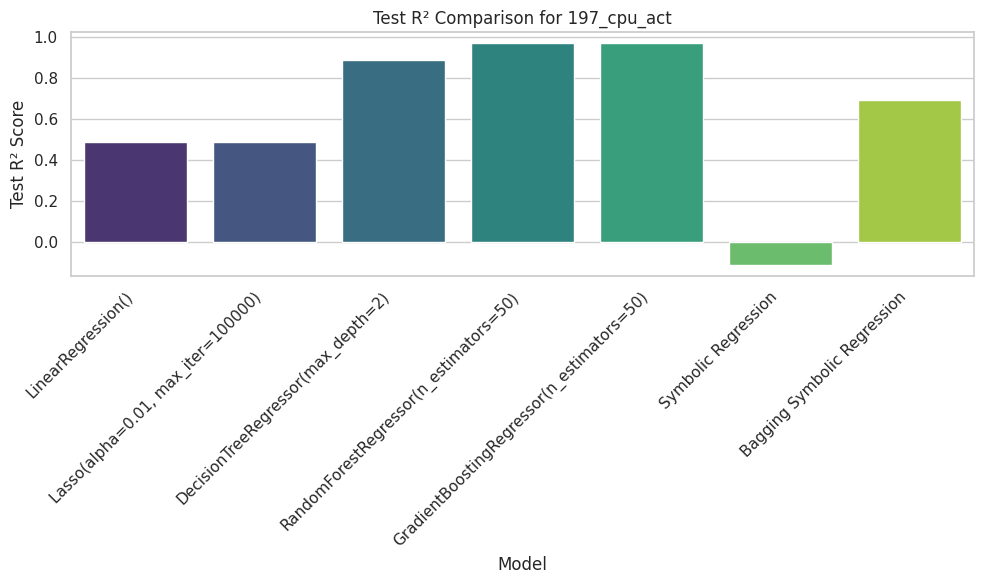

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


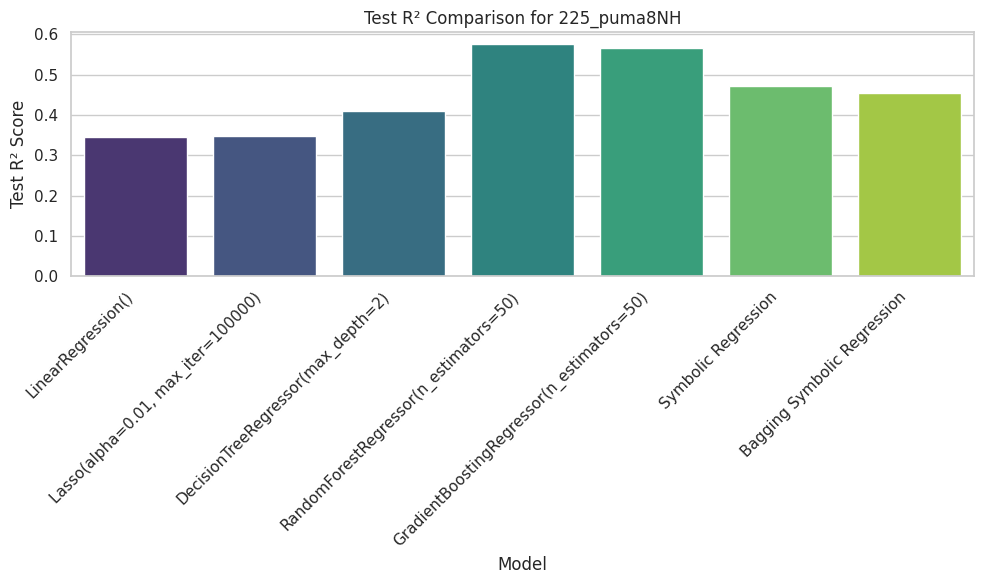

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


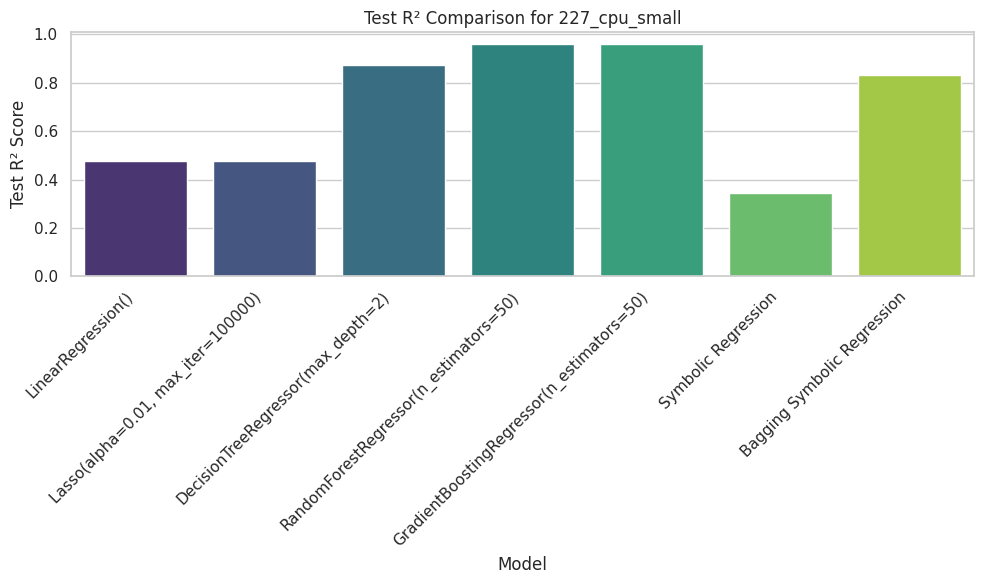

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


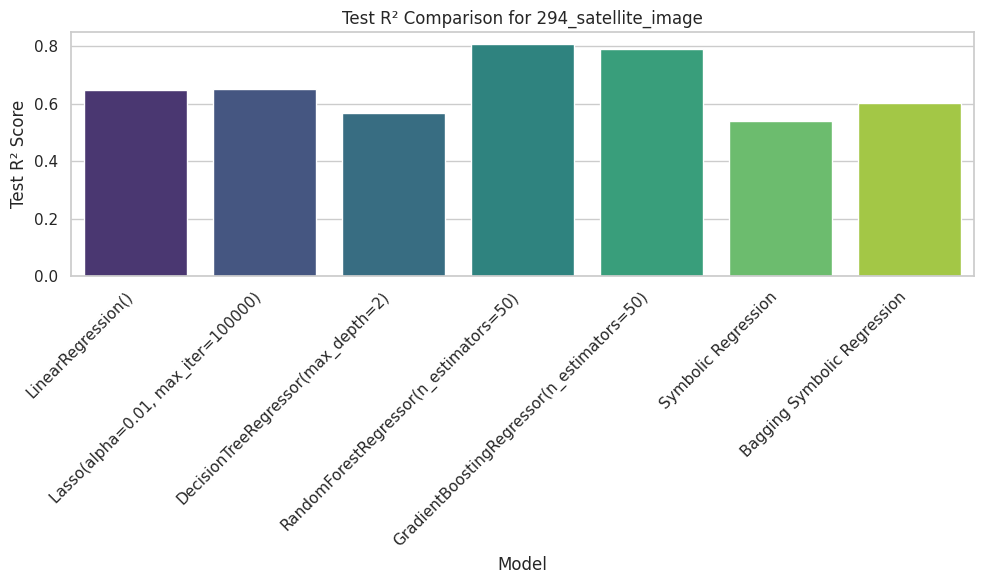

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


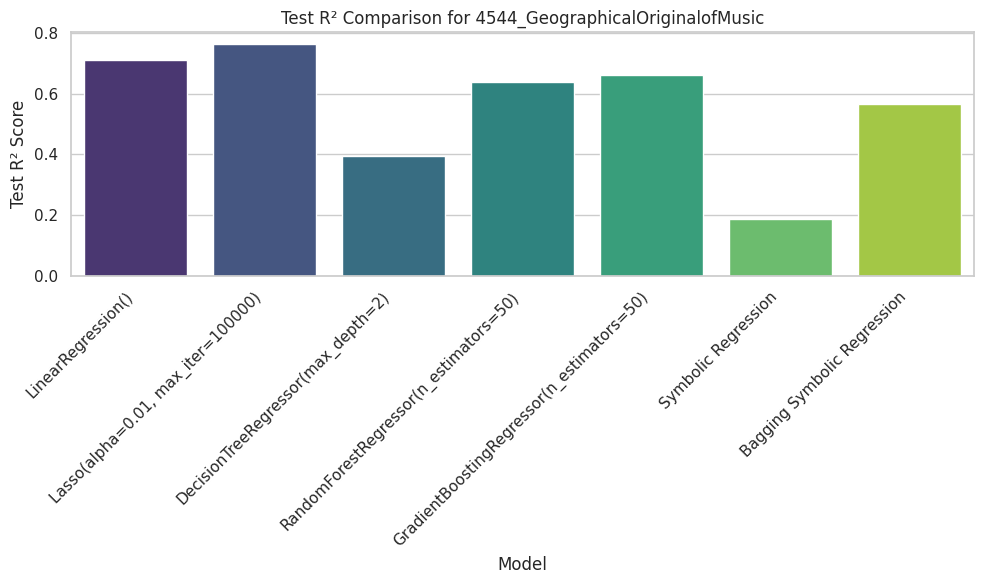

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


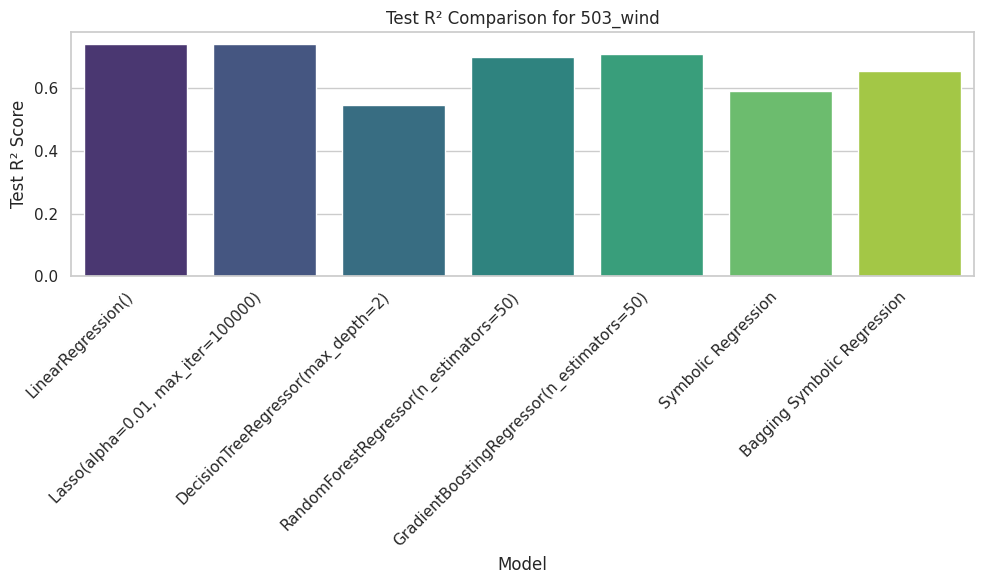

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


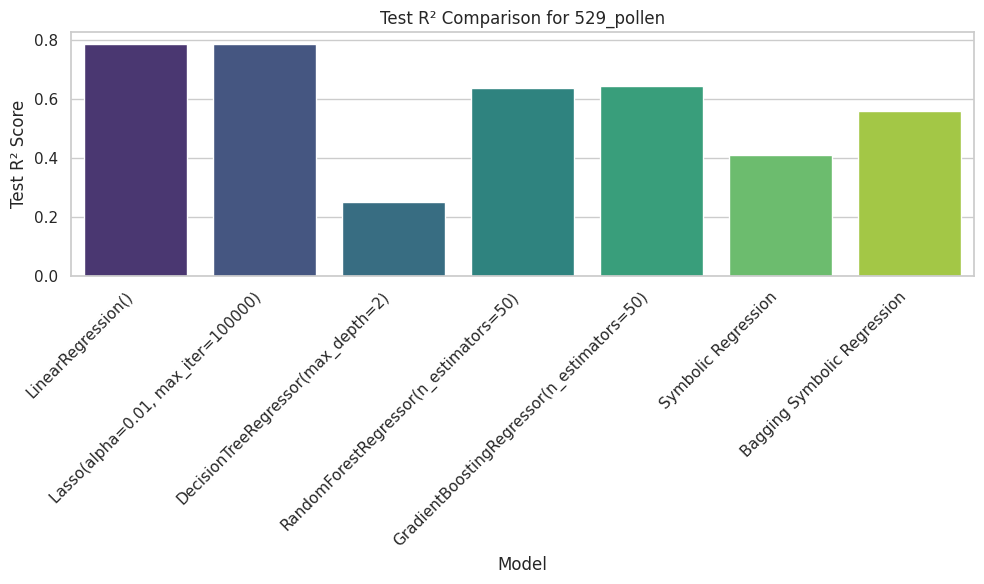

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


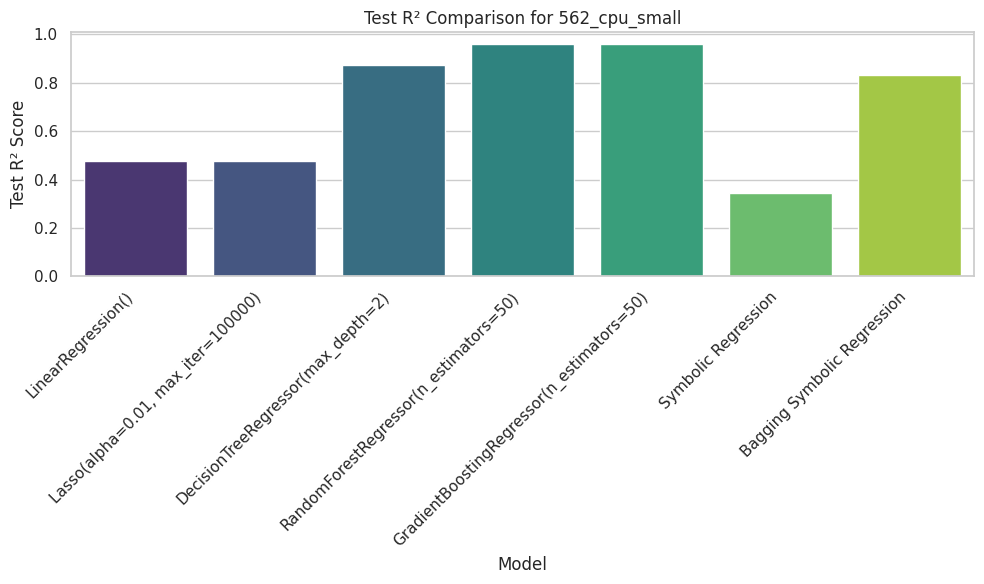

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


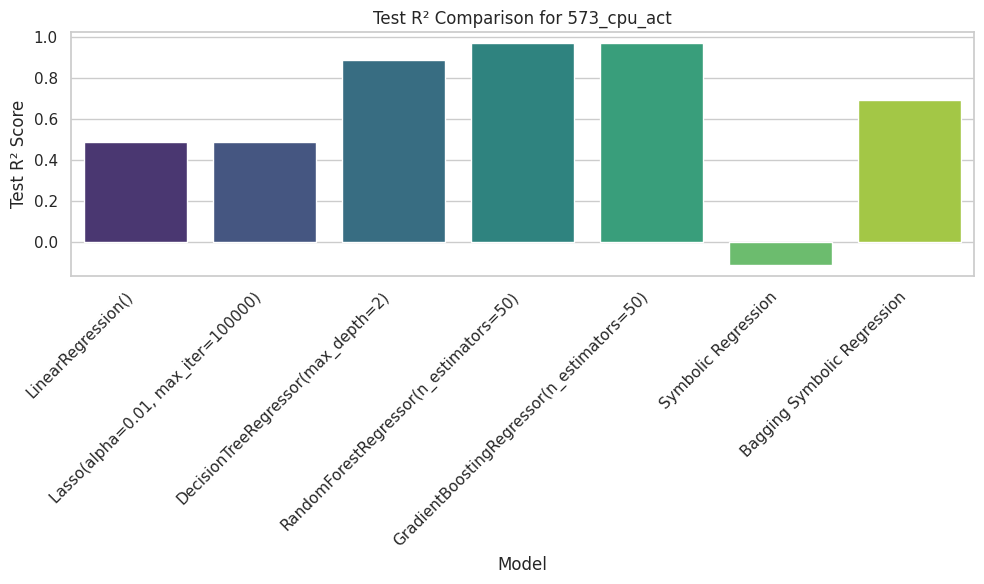

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


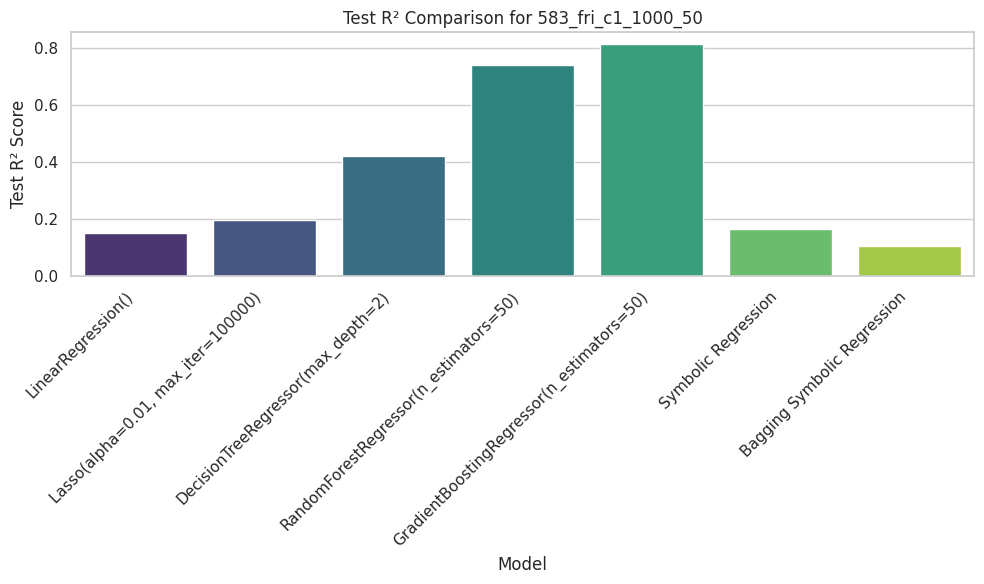

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


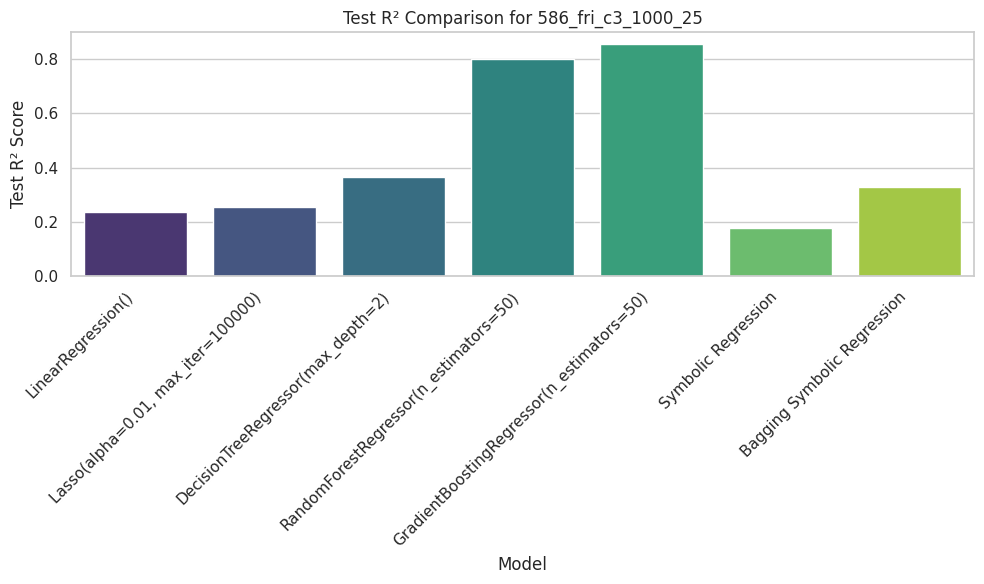

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


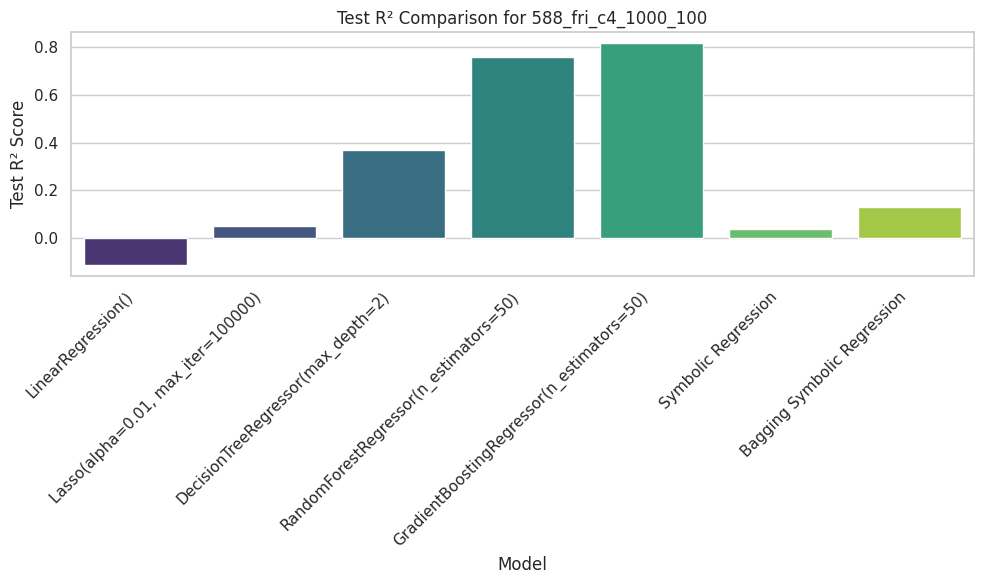

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


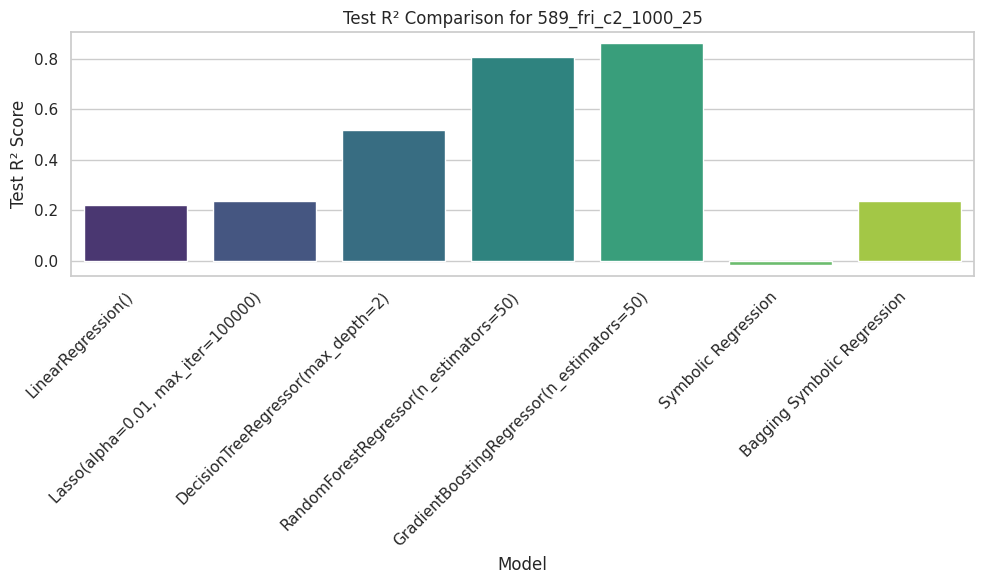

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


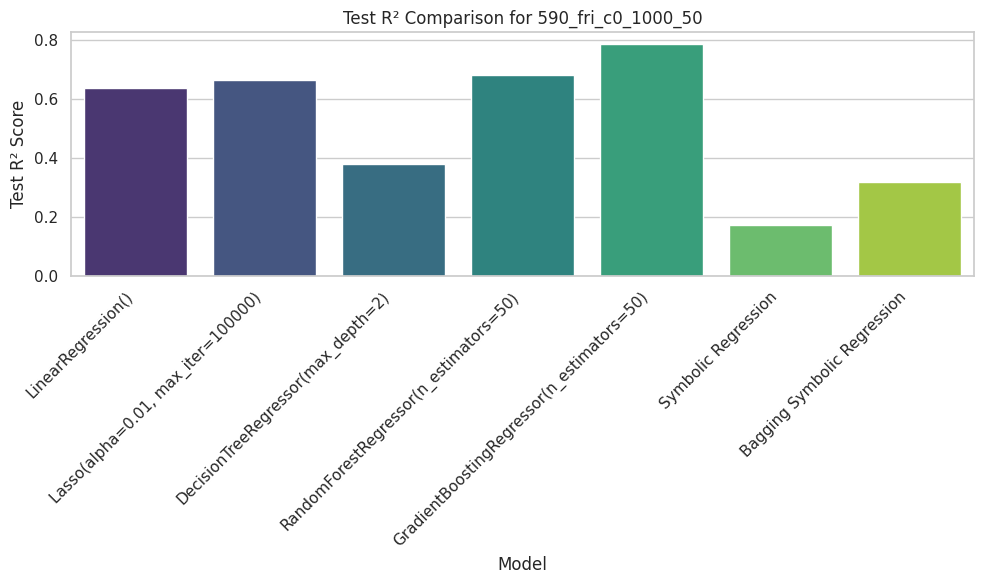

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


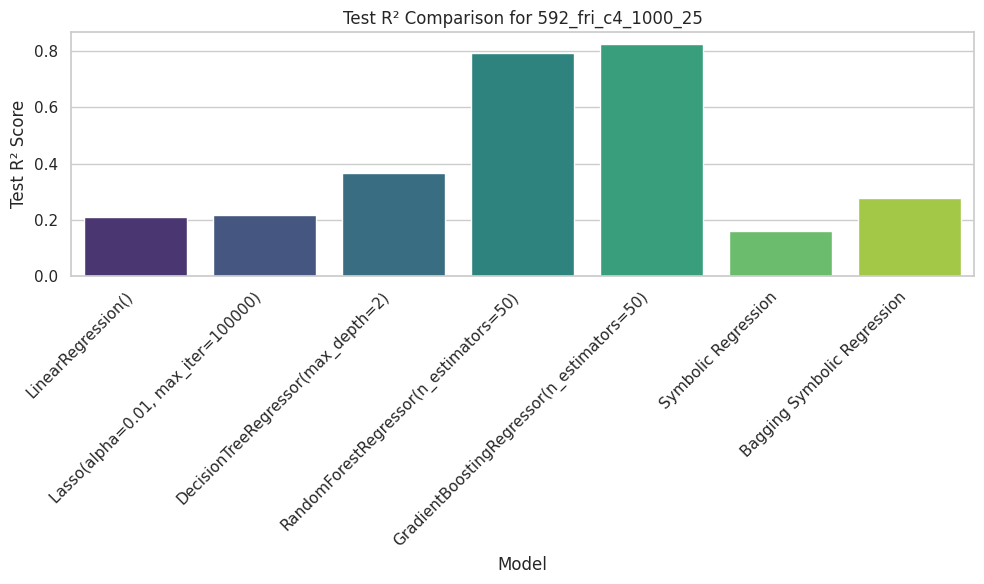

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


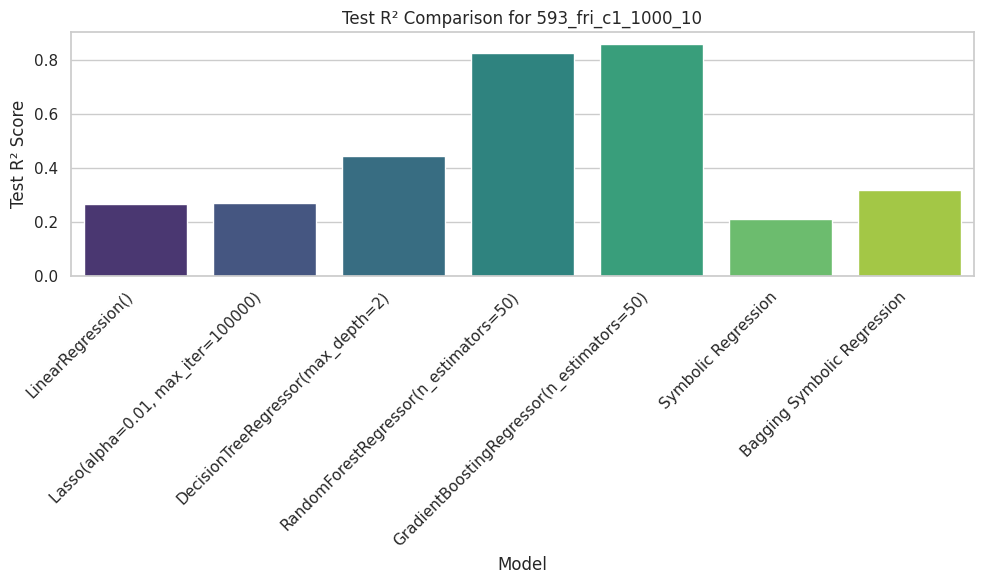

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


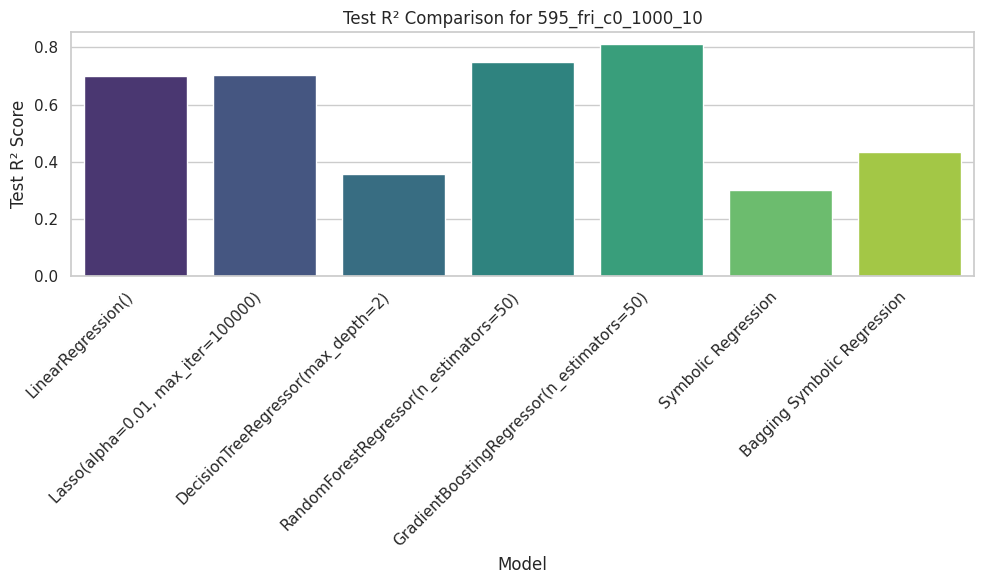

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


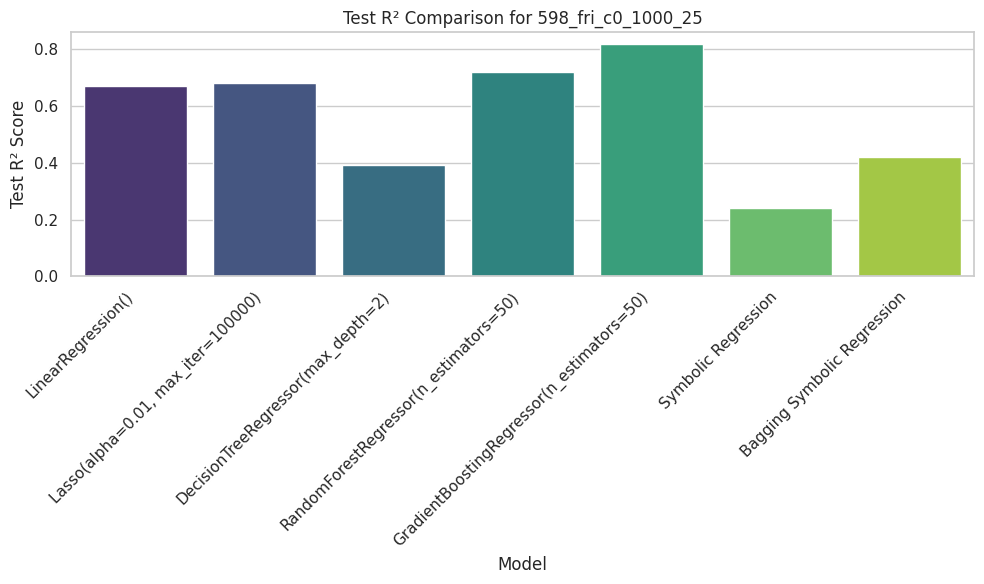

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


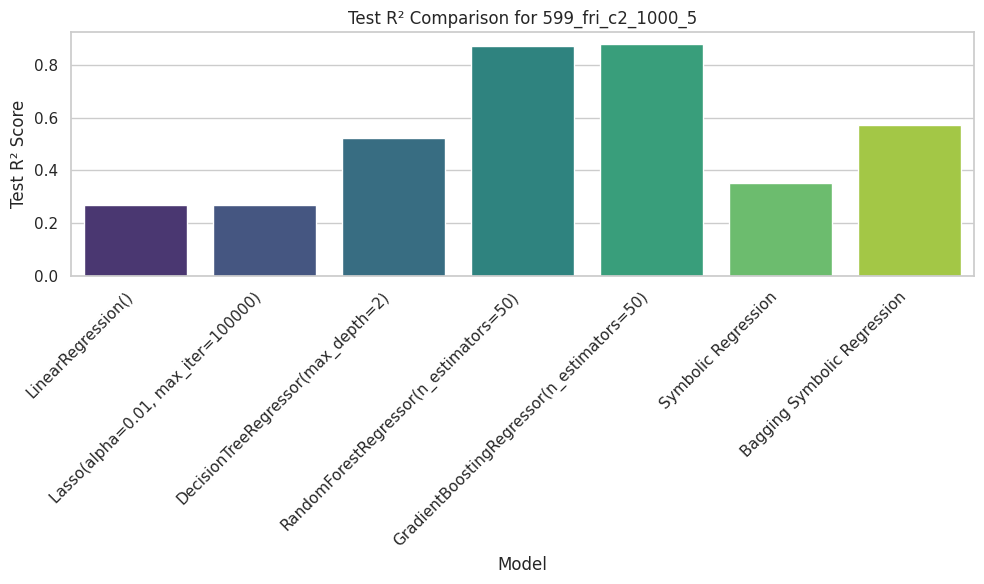

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


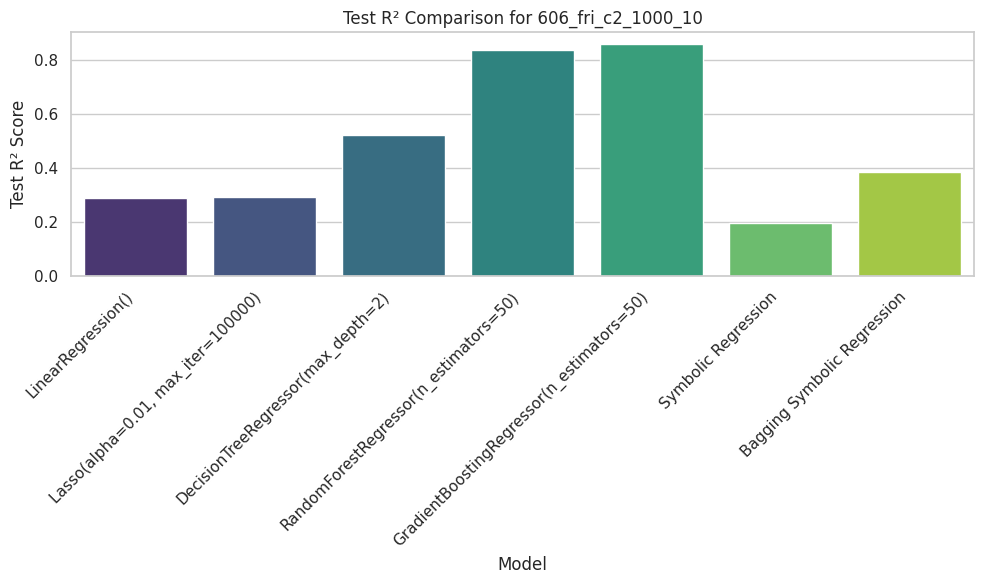

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


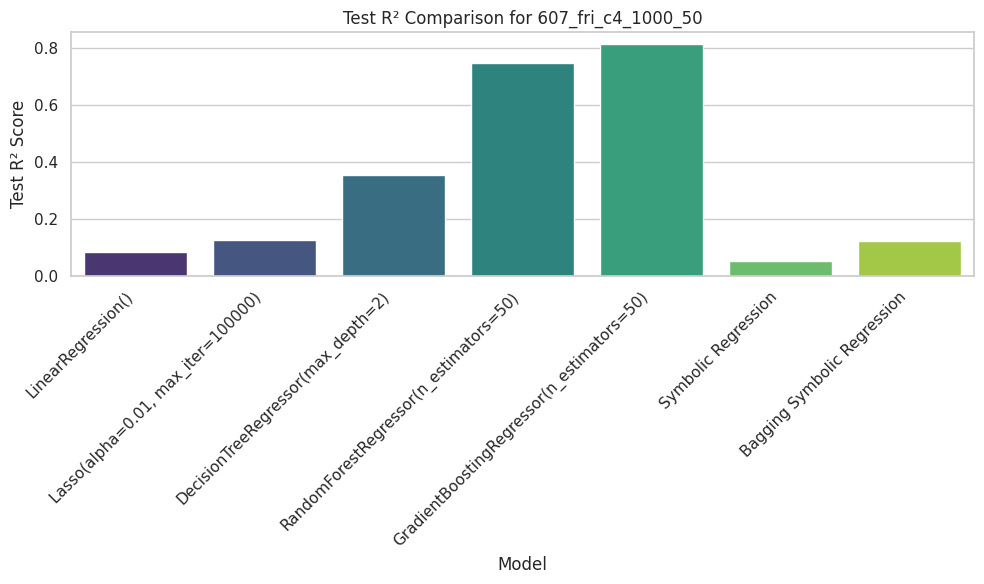

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


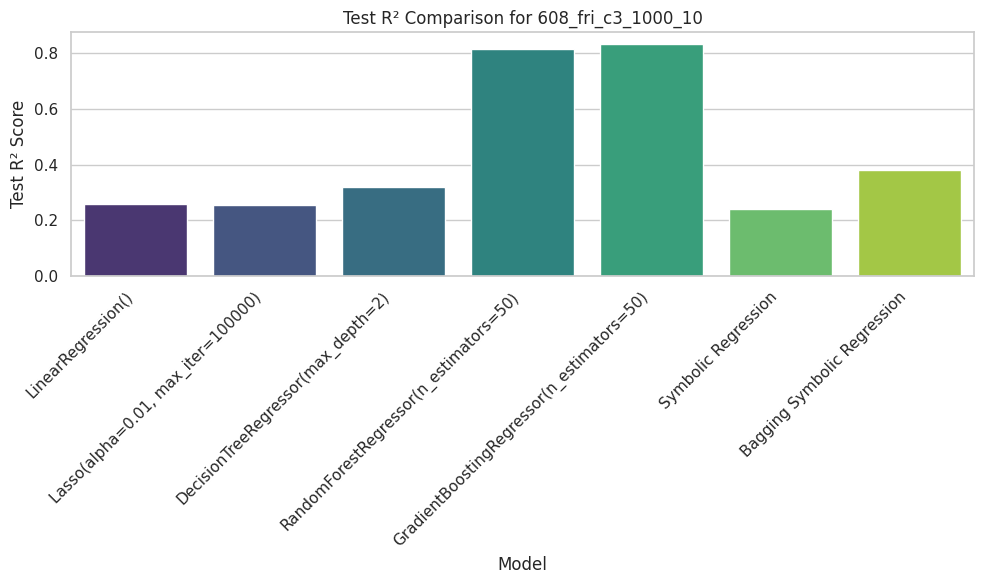

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


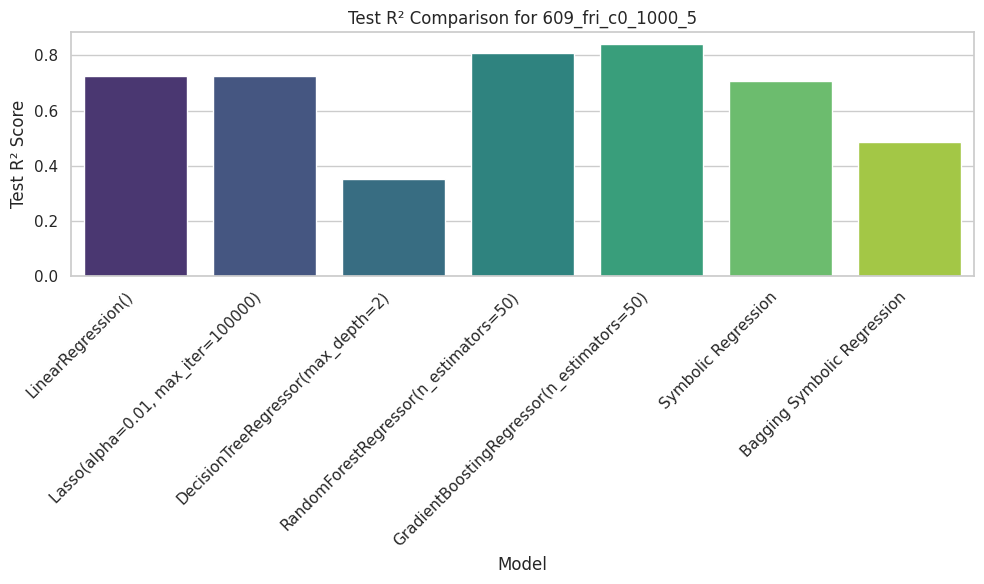

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


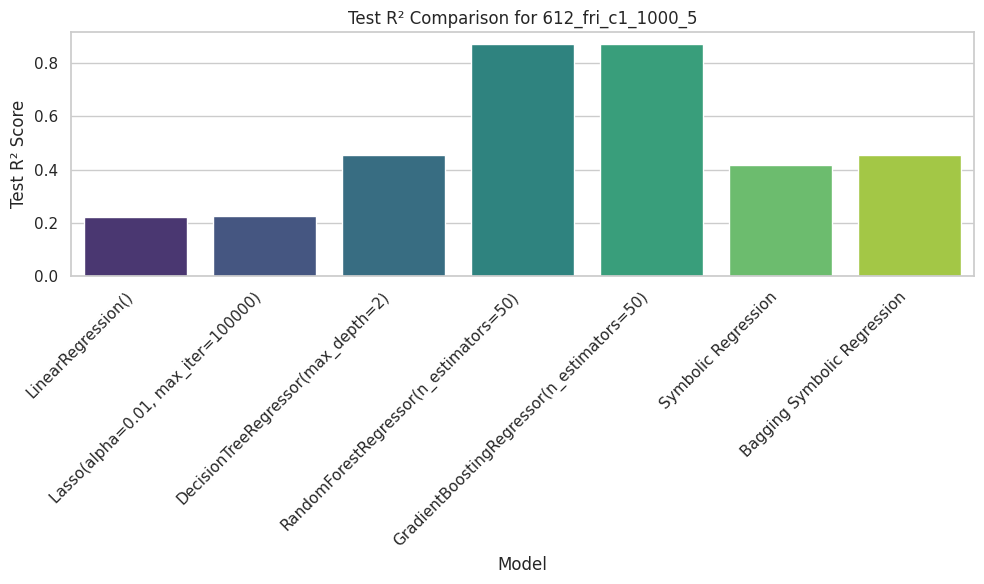

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


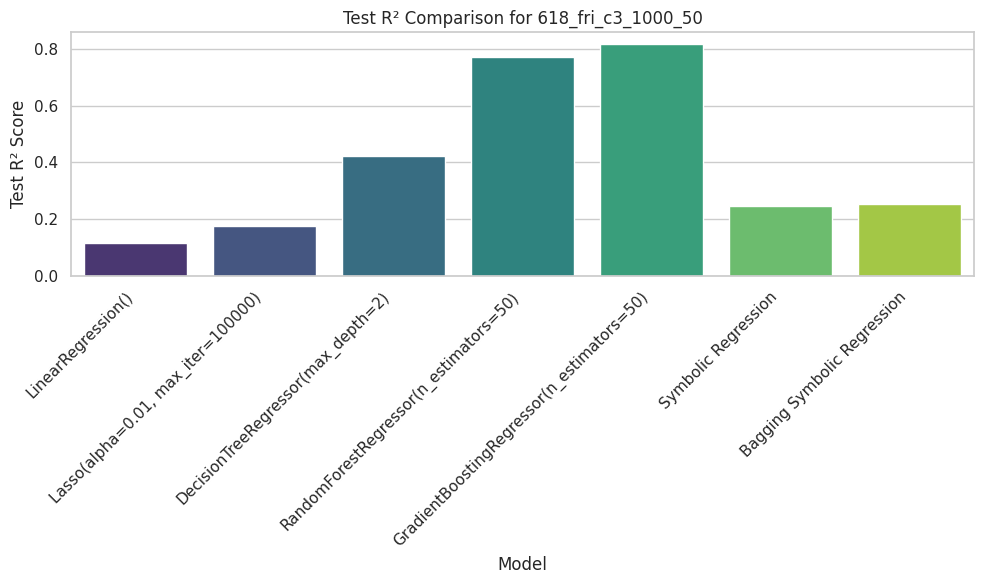

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


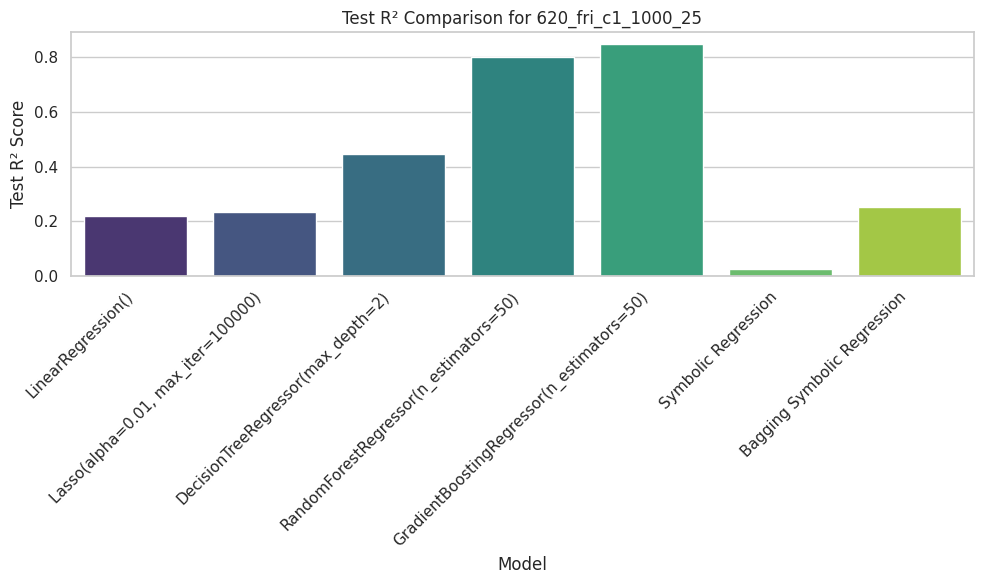

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


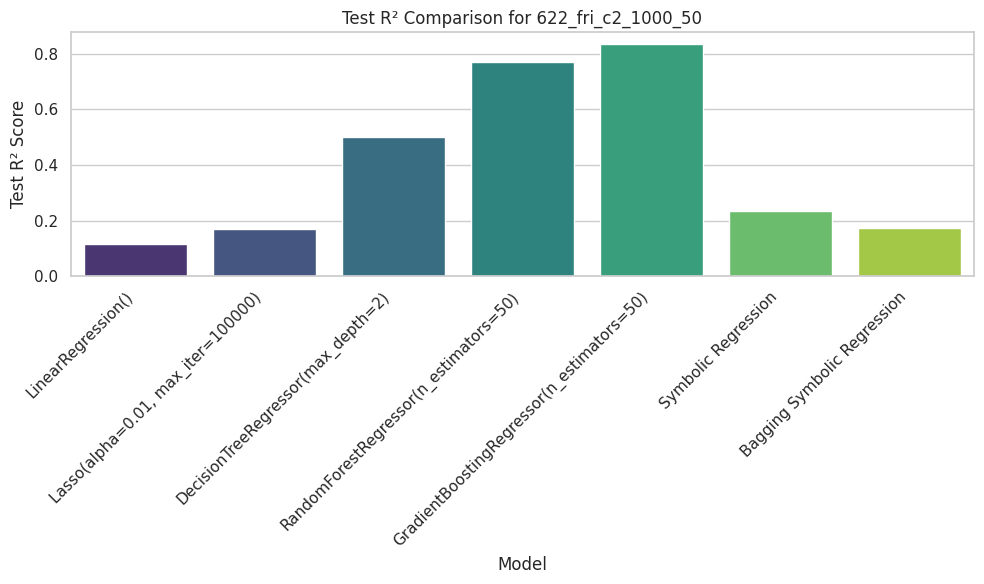

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


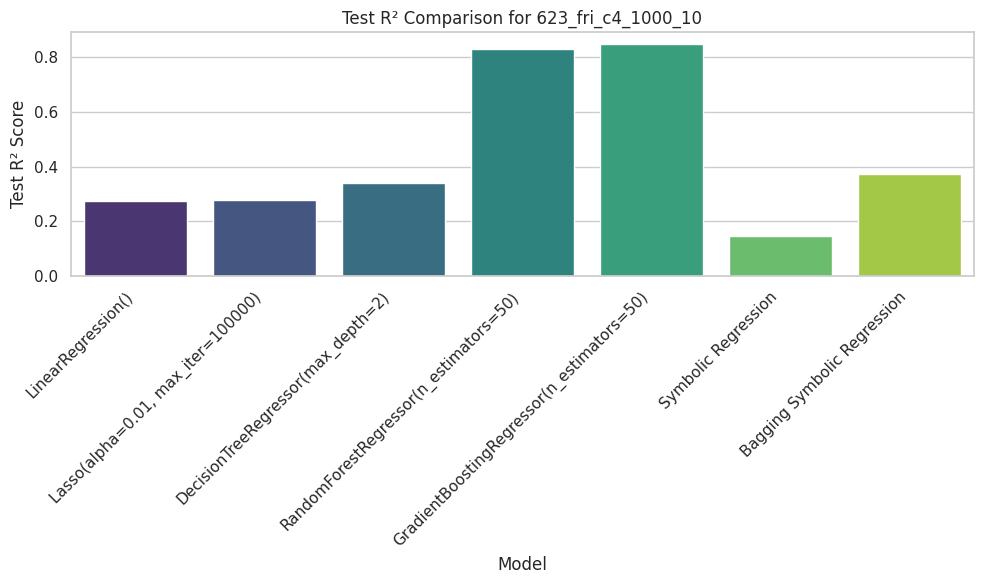

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


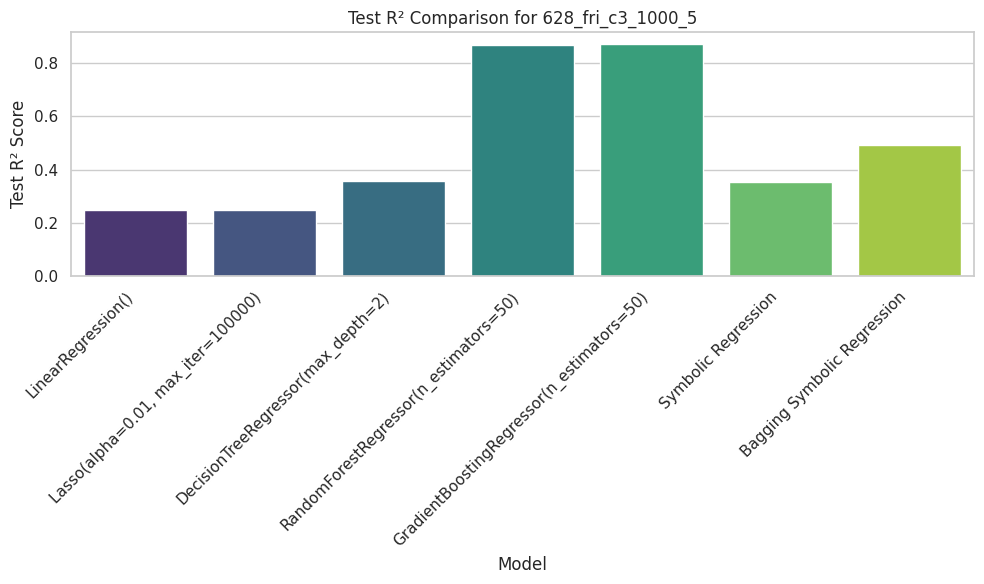

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


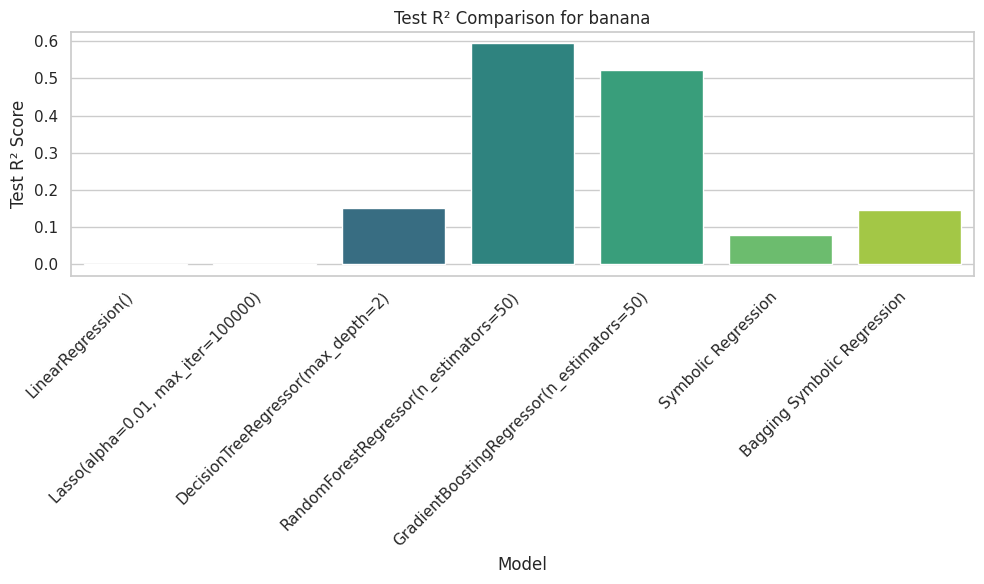

<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)
<ipython-input-19-84a7f76e5c61>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)


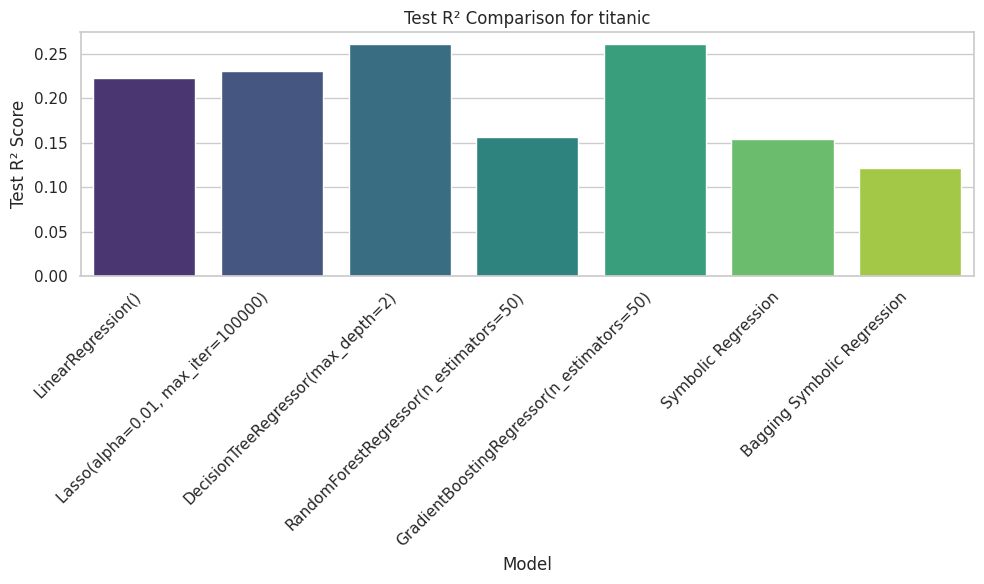

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 결과 불러오기
results = pd.read_csv("results-cache-100.csv")

# 시각화 설정
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 각 데이터셋에 대해 모델 성능 시각화 (test R²만)
for dataset_name in results['dataset'].unique():
    plt.figure(figsize=(10, 6))

    # 데이터셋별로 필터링
    dataset_results = results[results['dataset'] == dataset_name]

    # test R² 막대 그래프
    sns.barplot(data=dataset_results, x="model", y="test_r2", palette="viridis", ci=None)

    # 그래프 설정
    plt.title(f"Test R² Comparison for {dataset_name}")
    plt.xlabel("Model")
    plt.ylabel("Test R² Score")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()